In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import plothist
import pymaster as nmt
import healpy as hp
%matplotlib inline

In [2]:
data = np.load('/home/s59efara_hpc/covariance/data_sets/varied_numbers_compare_fixed_field.npy')

In [3]:
from scipy.integrate import simpson
lmin = 20
nell = 15
nside = 512
edges = np.geomspace(lmin,3*nside,nell).astype(int)                
delta_l = edges[1:] - edges[:-1]
cl_00 = np.load("/home/s59efara_hpc/covariance/test_cl_kappadm.npy")[:, 0, 0]
b = nmt.NmtBin.from_edges(edges[:-1], edges[1:])
ls = b.get_effective_ells()
clth_binned = b.bin_cell(cl_00[None, :3*nside])

field_variance = simpson(clth_binned*b.get_effective_ells(),x = b.get_effective_ells())/2./np.pi


sigma_th = (2*(clth_binned)**2)/(delta_l*(2*ls + 1))

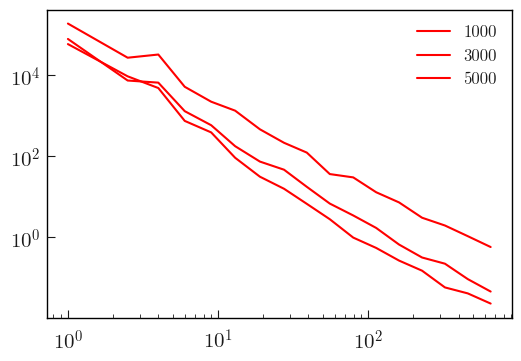

In [4]:
n_sources_list = np.array([1000, 3000, 5000], dtype=int)    

for i in range(len(n_sources_list)):
    ls, cls, sigma, Nf, Nf_var = data[i]
    plt.loglog(ls, sigma, label = n_sources_list[i], color = 'red')
    # sigma_th = (2*(clth_binned + field_variance/n_sources_list[i])**2)/(delta_l*(2*ls + 1))
    # plt.loglog(ls, sigma_th[0], color = 'black')

plt.legend()

In [5]:
field_variance = simpson(cls*ls,x = ls)/2./np.pi
Nw = np.sum(np.ones(5000))/(4*np.pi)

In [10]:
(Nw*field_variance/5000)**2

1649647.7611140676

In [6]:
Nf_var/(Nw*field_variance)**2

array([0.00064877, 0.00064877, 0.00064877, 0.00064877, 0.00064877,
       0.00064877, 0.00064877, 0.00064877, 0.00064877, 0.00064877,
       0.00064877, 0.00064877, 0.00064877, 0.00064877, 0.00064877,
       0.00064877, 0.00064877])

In [7]:
Nf_var

array([2.67560421e+10, 2.67560421e+10, 2.67560421e+10, 2.67560421e+10,
       2.67560421e+10, 2.67560421e+10, 2.67560421e+10, 2.67560421e+10,
       2.67560421e+10, 2.67560421e+10, 2.67560421e+10, 2.67560421e+10,
       2.67560421e+10, 2.67560421e+10, 2.67560421e+10, 2.67560421e+10,
       2.67560421e+10])

In [8]:
Nf/5000

array([1486.63599346, 1486.63599346, 1486.63599346, 1486.63599346,
       1486.63599346, 1486.63599346, 1486.63599346, 1486.63599346,
       1486.63599346, 1486.63599346, 1486.63599346, 1486.63599346,
       1486.63599346, 1486.63599346, 1486.63599346, 1486.63599346,
       1486.63599346])

In [ ]:
(Nf - Nw* field_variance/5000)

array([0.99983007, 0.99983007, 0.99983007, 0.99983007, 0.99983007,
       0.99983007, 0.99983007, 0.99983007, 0.99983007, 0.99983007,
       0.99983007, 0.99983007, 0.99983007, 0.99983007, 0.99983007,
       0.99983007, 0.99983007])

In [44]:
Nf

array([7451832.16839637, 7451832.16839637, 7451832.16839637,
       7451832.16839637, 7451832.16839637, 7451832.16839637,
       7451832.16839637, 7451832.16839637, 7451832.16839637,
       7451832.16839637, 7451832.16839637, 7451832.16839637,
       7451832.16839637, 7451832.16839637, 7451832.16839637,
       7451832.16839637, 7451832.16839637])